# Classification
- Logistic Regression
    - binomial (2 label)
    - multinomial (lebih dari 2 label)
    - ordinal (2+ label yang urut, misal rating 1,2,3,4,5)


- K - Nearest Neighbor

# Logistic Regression
1. kumpulkan data
2. rapikan data
3. bikin dan training model
4. evaluasi
5. tuning

In [112]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# logistic regression
from sklearn.linear_model import LogisticRegression

# k-nearest neighbor
from sklearn.neighbors import KNeighborsClassifier

# confusion matrix
# classification report
# accuracy score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# ambil data gambar tulisan tangan angka 0-9
# load wine adalah data tentang wine, ada 3 kelas wine berbeda 0-2
from sklearn.datasets import load_digits, load_wine

# untuk data preparation
# train test split memisahkan data awal jadi 2: untuk dipakai training, dan untuk dipakai testing
from sklearn.model_selection import train_test_split
# standard scaler mengubah data dari seluruh kolom supaya skala nya sama
# label encoder mengubah data tipe string menjadi integer, satu jenis string jadi satu angka bulat
from sklearn.preprocessing import StandardScaler, LabelEncoder

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


Text(0, 0.5, '0: tidak obes, 1: obes')

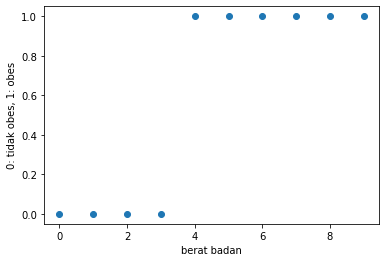

In [6]:
# 1. buat dummy data
# anggap x berat badan, y adalah 0: tidak obes, 1: obes
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

print(x)

plt.scatter(x, y)
plt.xlabel("berat badan")
plt.ylabel("0: tidak obes, 1: obes")

In [5]:
# 2. rapiin data - skip karena dummy data sudah rapi
# 3. membuat dan melatih model
model = LogisticRegression(solver="liblinear", random_state=0).fit(x, y)
model

LogisticRegression(random_state=0, solver='liblinear')

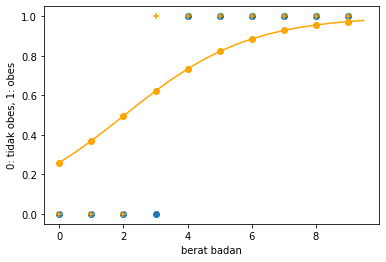

In [20]:
# visualisasi
# model bisa kita gunakan untuk membuat prediksi
# bikin dummy variable untuk berat badan 0 - 9
x_dummy = np.arange(0,10,0.5).reshape((-1,1))
y_dummy = model.predict_proba(x_dummy)
y_hasil = model.predict(x_dummy)

# print(y_hasil) # hasil y yang sudah jadi label
# untuk plot. perlu nya hasil y sebelum di convert jadi label

# print(y_dummy)

# plot data awal
plt.scatter(x, y)
plt.xlabel("berat badan")
plt.ylabel("0: tidak obes, 1: obes")

# plot hasil prediksi
plt.plot(x_dummy, y_dummy.T[1], color="orange")
plt.scatter(x, model.predict(x), color="orange", marker="+")
plt.scatter(x, model.predict_proba(x).T[1], color="orange")

### 4. evaluasi tingkat keakuratan model

Ada empat angka yang kita perhatikan saat evaluasi model klasifikasi:
- True positive:  berapa banyak yang beneran obes, kita prediksi benar obes (prediksi positif, benar) 6
- False positive: berapa banyak yang aslinya tidak obes, kita preidksi obes (prediksi positif, tapi salah) 1
- True negative:  berpaa banyak yang beneran tidak obes, kita prediksi benar tidak obes (prediksi negatif, benar) 3
- False negative: berapa banyak yang aslinya obes, kita prediksi tidak obes (prediksi negatif, tapi salah) 0

Ke-empat angka ini bisa kita visualisasikan dengan sebuah confusion matrix.
[ 
    [3, 1]
    [0, 6]
]

In [24]:
# membuat confusion matrix

cm = confusion_matrix(y, model.predict(x))
cm

array([[3, 1],
       [0, 6]], dtype=int64)

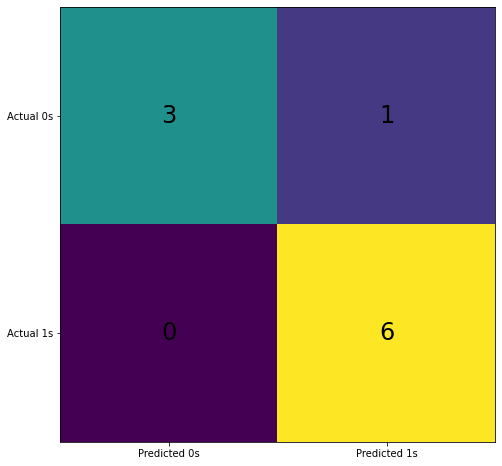

In [27]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=24)
plt.show()

In [30]:
# classification_report
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



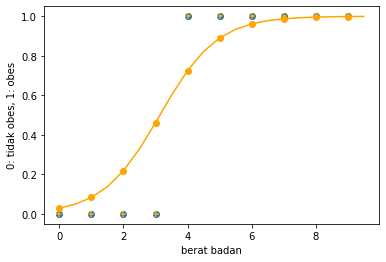

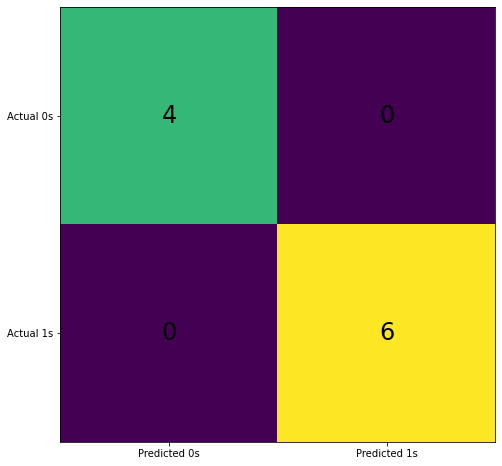

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [35]:
# 5. tuning, kita akan coba tambahkan kekuatan regularization model nya
model = LogisticRegression(solver="liblinear", C=10.0, random_state=0).fit(x, y)

# visualisasi
x_dummy = np.arange(0,10,0.5).reshape((-1,1))
y_dummy = model.predict_proba(x_dummy)
y_hasil = model.predict(x_dummy)

# plot data awal
plt.scatter(x, y)
plt.xlabel("berat badan")
plt.ylabel("0: tidak obes, 1: obes")

# plot hasil prediksi
plt.plot(x_dummy, y_dummy.T[1], color="orange")
plt.scatter(x, model.predict(x), color="orange", marker="+")
plt.scatter(x, model.predict_proba(x).T[1], color="orange")

# evaluasi
cm = confusion_matrix(y, model.predict(x))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=24)
plt.show()

print(classification_report(y, model.predict(x)))

# Digits - data gambar tulisan tangan angka 0-9
klasifikasi menggunakan model Logistic Regression apakah sebuah gambar adalah angka berapa (0-9) -> 10 label berbeda.

In [37]:
x, y = load_digits(return_X_y=True)

print(x)
print(y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [38]:
print(x.shape, y.shape)

(1797, 64) (1797,)


(-0.5, 7.5, 7.5, -0.5)

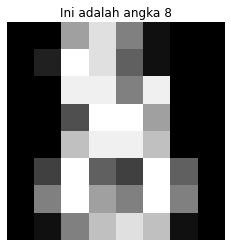

In [54]:
# setiap baris x adalah sebuah gambar (64 pixels, masing2 pixel jadi 1 kolom)
# setiap value y adalah jawabannya, gambar itu sedang menulis angka berapa
# kita bisa bangun kembali gambarnya dari data ini

n = 1796 # gambar ke berapa dari 1797 gambar load_digits
gambar = np.array(x)[n]
jawaban = np.array(y)[n]
plt.imshow(gambar.reshape((8,8)), cmap="gray")
plt.title("Ini adalah angka " + str(jawaban))
plt.axis("off")

In [77]:
# 2. data preparation
# scaling dulu
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# pisahin jadi testing dan training data
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=0, test_size=0.2) # 20% data digunakan untuk testing
print(y_train.shape, y_test.shape)
# print(y_train[:10])

(1437,) (360,)


In [59]:
# perbandingna data asli dan yang sudah di scaled
print(x[0])
print(x_scaled[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[ 0.         -0.33501649 -0.04308102  0.27407152 -0.66447751 -0.84412939
 -0.40972392 -0.12502292 -0.05907756 -0.62400926  0.4829745   0.75962245
 -0.05842586  1.12772113  0.87958306 -0.13043338 -0.04462507  0.11144272
  0.89588044 -0.86066632 -1.14964846  0.51547187  1.90596347 -0.11422184
 -0.03337973  0.48648928  0.46988512 -1.49990136 -1.61406277  0.07639777
  1.54181413 -0.04723238  0.          0.76465553  0.05263019 -1.44763006
 -1.73666443  0.04361588  1.43955804  0.         -0.06134367  0.8105536
  0.63011714 -1.12245711 -1.06623158  0.66096475  0.81845076 -0.08874162
 -0.03543326  0.74211893  1.15065212 -0.86867056  0.11012973  0.53761116
 -0.75743581 -0.20978513 -0.02359646 -0.29908135  0.08671869  0.20829258
 -0.366771

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.87      0.94      0.90        35
           2       0.97      0.97      0.97        36
           3       0.94      1.00      0.97        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       0.93      1.00      0.96        39
           8       0.94      0.87      0.91        39
           9       1.00      0.90      0.95        41

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



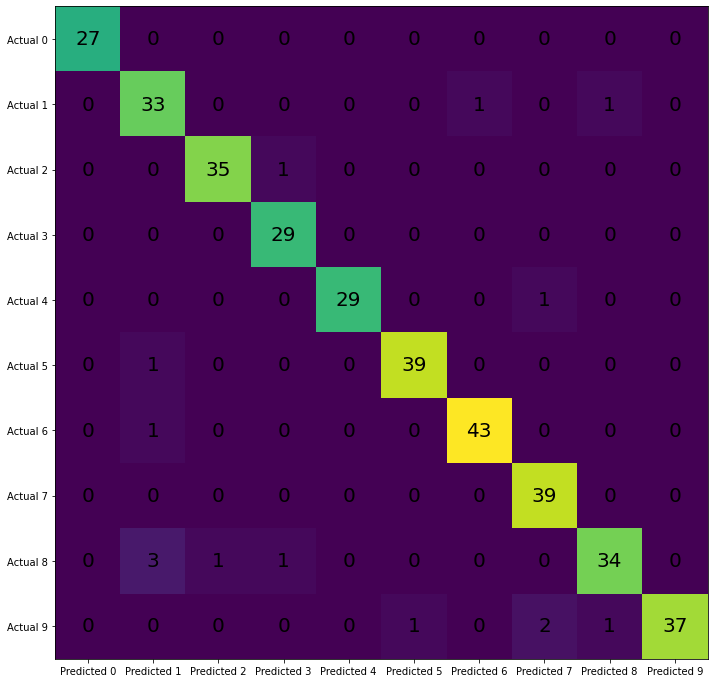

In [85]:
# buat dan latih model dengan data training
model = LogisticRegression(random_state=0, solver="liblinear").fit(x_train, y_train)

# evaluasi dengan data testing
print(classification_report(y_test, model.predict(x_test)))

cm = confusion_matrix(y_test, model.predict(x_test))
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(cm)
ax.grid(False)

labels = range(10)
ticklabels_p = []
ticklabels_a = []

for l in labels:
    ticklabels_p.append("Predicted " + str(l))
    ticklabels_a.append("Actual " + str(l))

ax.xaxis.set(ticks=labels, ticklabels=ticklabels_p)
ax.yaxis.set(ticks=labels, ticklabels=ticklabels_a)
ax.set_ylim(9.5, -0.5)
for i in labels:
    for j in labels:
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=20)
plt.show()

# K-NN
K-Nearest Neighbor



In [89]:
# 1. siapkan data, buat data dummy
# First Feature
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']

# Second Feature
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

# Label or target varible
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

df = pd.DataFrame({"weather":weather, "temperature":temp, "play":play})
df

,weather,temperature,play
0,Sunny,Hot,No
1,Sunny,Hot,No
2,Overcast,Hot,Yes
3,Rainy,Mild,Yes
4,Rainy,Cool,Yes
5,Rainy,Cool,No
6,Overcast,Cool,Yes
7,Sunny,Mild,No
8,Sunny,Cool,Yes
9,Rainy,Mild,Yes


In [94]:
# 2. data preparation, kita perlu prep data pakai encoding karena ada data tipe string
le = LabelEncoder()

weather_en = le.fit_transform(weather)
# print(weather_en)
print("weather",le.classes_)

temp_en = le.fit_transform(temp)
print("temp",le.classes_)

play_en = le.fit_transform(play)
print("play",le.classes_)

df2 = pd.DataFrame({"weather":weather_en, "temperature":temp_en, "play":play_en})
df2

weather ['Overcast' 'Rainy' 'Sunny']
temp ['Cool' 'Hot' 'Mild']
play ['No' 'Yes']


,weather,temperature,play
0,2,1,0
1,2,1,0
2,0,1,1
3,1,2,1
4,1,0,1
5,1,0,0
6,0,0,1
7,2,2,0
8,2,0,1
9,1,2,1


In [104]:
features = df2[['weather', 'temperature']]
target = df2['play']

# 3. buat dan training model
k = 1 # jumlah neighbor yang mau ikut digunakan untuk menentukan data terbaru adalah kelas apa
model = KNeighborsClassifier(n_neighbors=k)
model.fit(features, target)



KNeighborsClassifier(n_neighbors=1)

              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.80      0.89      0.84         9

    accuracy                           0.79        14
   macro avg       0.78      0.74      0.75        14
weighted avg       0.78      0.79      0.78        14



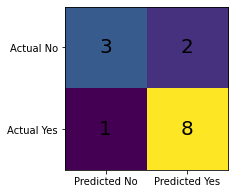

In [105]:
# 4. evaluasi keakuratan model
print(classification_report(target, model.predict(features)))

cm = confusion_matrix(target, model.predict(features))
fig, ax = plt.subplots(figsize=(3,3))
ax.imshow(cm)
ax.grid(False)

labels = ["No", "Yes"]
ticklabels_p = []
ticklabels_a = []

for l in labels:
    ticklabels_p.append("Predicted " + str(l))
    ticklabels_a.append("Actual " + str(l))

ax.xaxis.set(ticks=range(len(labels)), ticklabels=ticklabels_p)
ax.yaxis.set(ticks=range(len(labels)), ticklabels=ticklabels_a)
ax.set_ylim(1.5, -0.5)
for i in range(len(labels)):
    for j in range(len(labels)):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=20)
plt.show()

untuk mengetahui jumlah neighbor yang paling optimal berapa (untuk model paling akurat), kita bisa coba cek accuracy model nya dengan k berbeda-beda.

set angka accuracy dengan set angka jumlah neighbor yang digunakan (k) bisa kita plot.

Text(0, 0.5, 'accuracy rate')

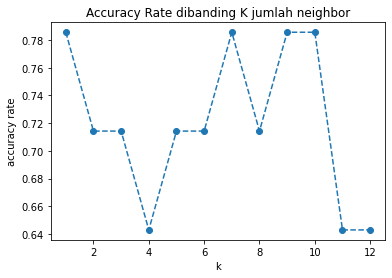

In [111]:
# kita plot error rate dengan jumlah neighbor
features = df2[['weather', 'temperature']]
target = df2['play']

# untuk k = 1-12, berapa error rate model kita?
accuracy_rate = []
for k in range(1, 13):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(features, target)
    accuracy_rate.append(accuracy_score(target, model.predict(features)))

plt.plot(range(1,13), accuracy_rate, marker="o", linestyle="dashed")
plt.title("Accuracy Rate dibanding K jumlah neighbor")
plt.xlabel("k")
plt.ylabel("accuracy rate")

# KNN dengan data wine

In [119]:
# 1. kumpulkan data
wine = load_wine()
print(wine.feature_names)
print(len(wine.feature_names))

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
13


In [116]:
print(wine.target_names) # label apa saja

['class_0' 'class_1' 'class_2']


In [121]:
print(wine.target)
print(len(wine.target))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
178


In [118]:
print(wine.data) # data featuresnya
print(wine.data.shape)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
(178, 13)


In [123]:
df_wine = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df_wine['label'] = wine.target
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [124]:
# 2. prep data
# split data jadi training dan testing data
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, random_state=0)
print(x_train.shape, len(y_train))
print(x_test.shape, len(y_test))

(133, 13) 133
(45, 13) 45


In [126]:
# 3. buat dan latih model
k = 1
model = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)

# 4. evaluasi model
print(accuracy_score(y_test, model.predict(x_test)))

0.7555555555555555


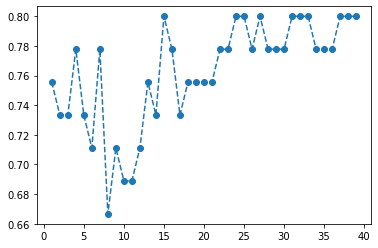

In [130]:
score_array = []
for k in range(1, 40):
    # 3. buat dan latih model
    model = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)

    # 4. evaluasi model
    score_array.append(accuracy_score(y_test, model.predict(x_test)))
    
# plot perbandingan jumlah k neighbor dengan tingkat akurasi model
plt.plot(range(1,40), score_array, marker="o", linestyle="dashed")

sepertinya jumlah k = 25 membuat model yang paling akurat

In [132]:
k = 25
model = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)
hasil_prediksi_test = model.predict(x_test)
print(accuracy_score(y_test, hasil_prediksi_test))

0.8


In [133]:
# cek keakuratan model dengan cara lainnya
print(classification_report(y_test, hasil_prediksi_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.88      0.71      0.79        21
           2       0.46      0.75      0.57         8

    accuracy                           0.80        45
   macro avg       0.78      0.80      0.78        45
weighted avg       0.85      0.80      0.81        45



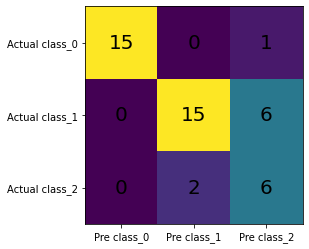

In [135]:
cm = confusion_matrix(y_test, hasil_prediksi_test)
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(cm)
ax.grid(False)

labels = wine.target_names
ticklabels_p = []
ticklabels_a = []

for l in labels:
    ticklabels_p.append("Pre " + str(l))
    ticklabels_a.append("Actual " + str(l))

ax.xaxis.set(ticks=range(len(labels)), ticklabels=ticklabels_p)
ax.yaxis.set(ticks=range(len(labels)), ticklabels=ticklabels_a)
ax.set_ylim(2.5, -0.5)
for i in range(len(labels)):
    for j in range(len(labels)):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=20)
plt.show()